In [1]:
import matplotlib
import uproot, uproot3
import numpy
import awkward
import numba
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import pandas as pd
from tqdm import trange
import ROOT
import os,sys
from array import array
import pickle

from Lumi import *
from Ratio_Plot import *
from TDR_Style import *

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/uproot3/__init__.py:127: FutureWarning: Consider switching from 'uproot3' to 'uproot', since the new interface became the default in 2020.

    pip install -U uproot

In Python:

    >>> import uproot
    >>> with uproot.open(...) as file:
    ...

  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/awkward0/__init__.py:12: FutureWarning: Consider switching from 'awkward0' to 'awkward', since the new interface became the default in 2020.

    pip install -U awkward

In Python:

    >>> import awkward as ak
    >>> new_style_array = ak.from_awkward0(old_style_array)
    >>> old_style_array = ak.to_awkward0(new_style_array)

  warnings.warn(


Welcome to JupyROOT 6.24/06


In [2]:
uproot.__version__

'4.0.1'

## 1. Make template

In [3]:
def AddHist_data(file, hist, ptrange, isbarrel,closure=False,xsec=1,lumi=1):


    if 'MuonEG_Run2016H' in file:
        branches = uproot.open(file+':Events').arrays([
                    'channel_mark'
                    ,'HLT_Ele27_WPTight_Gsf'
                    ,'HLT_IsoTkMu24'
                    ,'HLT_IsoMu24'
                    ,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL'
                    ,'HLT_Mu17_TrkIsoVVL_TkMu8_TrkIsoVVL'
                    ,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ'
                    ,'HLT_Mu17_TrkIsoVVL_TkMu8_TrkIsoVVL_DZ'
                    ,'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL'
                    ,'HLT_Mu23_TrkIsoVVL_Ele8_CaloIdL_TrackIdL_IsoVL'
                    ,'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ'
                    ,'HLT_Mu23_TrkIsoVVL_Ele8_CaloIdL_TrackIdL_IsoVL_DZ'
                    ,'HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL_DZ'
                    ,'More_than_three_tight_lep'
                    ,'photon_sieie'
                    ,'photon_vidNestedWPBitmap'
                    ,'photon_eta'
                    ,'photon_pt'
                    ,'photon_pfRelIso03_chg'], library='pd')
    
    else:
        branches = uproot.open(file+':Events').arrays([
                    'channel_mark'
                    ,'HLT_Ele27_WPTight_Gsf'
                    ,'HLT_IsoTkMu24'
                    ,'HLT_IsoMu24'
                    ,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL'
                    ,'HLT_Mu17_TrkIsoVVL_TkMu8_TrkIsoVVL'
                    ,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ'
                    ,'HLT_Mu17_TrkIsoVVL_TkMu8_TrkIsoVVL_DZ'
                    ,'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL'
                    ,'HLT_Mu23_TrkIsoVVL_Ele8_CaloIdL_TrackIdL_IsoVL'
                    ,'HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL_DZ'
                    ,'More_than_three_tight_lep'
                    ,'photon_sieie'
                    ,'photon_vidNestedWPBitmap'
                    ,'photon_eta'
                    ,'photon_pt'
                    ,'photon_pfRelIso03_chg'], library='pd')        
        

     # Single Electron HLT
    HLT_SingleElectron = branches.loc[:,'HLT_Ele27_WPTight_Gsf'] == True

    # DoubleEG HLT
    HLT_DoubleEG = branches.loc[:,'HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL_DZ'] == True

    # Single MuonHLT
    HLT_SingleMuon1 = branches.loc[:,'HLT_IsoTkMu24'] == True
    HLT_SingleMuon2 = branches.loc[:,'HLT_IsoMu24'] == True
    comb_HLT_SingleMuon  = (HLT_SingleMuon1 | HLT_SingleMuon2)

    # Double Muon HLT
    HLT_DoubleMuon1 = branches.loc[:,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL'] == True
    HLT_DoubleMuon2 = branches.loc[:,'HLT_Mu17_TrkIsoVVL_TkMu8_TrkIsoVVL'] == True
    HLT_DoubleMuon3 = branches.loc[:,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ'] == True
    HLT_DoubleMuon4 = branches.loc[:,'HLT_Mu17_TrkIsoVVL_TkMu8_TrkIsoVVL_DZ'] == True
    if 'DoubleMuon_Run2016H'in file:
        comb_HLT_DoubleMuon = (HLT_DoubleMuon3 | HLT_DoubleMuon4)
    elif 'DoubleMuon_Run2016' in file:
        comb_HLT_DoubleMuon = (HLT_DoubleMuon1 | HLT_DoubleMuon2)
    else:
        comb_HLT_DoubleMuon = (HLT_DoubleMuon1 | HLT_DoubleMuon2) | (HLT_DoubleMuon3 | HLT_DoubleMuon4)

    # MuonEG HLT
    HLT_MuonEG1 = branches.loc[:,'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL'] == True
    HLT_MuonEG2 = branches.loc[:,'HLT_Mu23_TrkIsoVVL_Ele8_CaloIdL_TrackIdL_IsoVL'] == True


    if 'MuonEG_Run2016H' in file:
        HLT_MuonEG3 = branches.loc[:,'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ'] == True
        HLT_MuonEG4 = branches.loc[:,'HLT_Mu23_TrkIsoVVL_Ele8_CaloIdL_TrackIdL_IsoVL_DZ'] == True
        comb_HLT_MuonEG = (HLT_MuonEG1 | HLT_MuonEG2) | (HLT_MuonEG3 | HLT_MuonEG4)
    else:
        comb_HLT_MuonEG = (HLT_MuonEG1 | HLT_MuonEG2)

    print('before trigger',len(branches))
    # Apply trigger
    if 'SingleMuon' in file:
        print('SingleMuon trigger')
        arrays = branches.loc[comb_HLT_SingleMuon , :].copy()
    elif 'DoubleMuon' in file:
        print('DoubleMuon trigger')
        arrays = branches.loc[~comb_HLT_SingleMuon & comb_HLT_DoubleMuon, :].copy()
    elif 'SingleElectron' in file:
        print('SingleElectron trigger')
        arrays = branches.loc[~comb_HLT_SingleMuon & ~comb_HLT_DoubleMuon &   HLT_SingleElectron ,:].copy()
    elif 'MuonEG' in file:
        print('MuonEG Trigger')
        arrays = branches.loc[~comb_HLT_SingleMuon & ~comb_HLT_DoubleMuon &  ~HLT_SingleElectron & comb_HLT_MuonEG,:].copy()
    elif 'DoubleEG' in file:
        print('DoubleEG trigger')
        arrays = branches.loc[~comb_HLT_SingleMuon & ~comb_HLT_DoubleMuon &  ~HLT_SingleElectron & ~comb_HLT_MuonEG & HLT_DoubleEG,:].copy()
        
    else:
        print('isMC')
        arrays = branches.loc[comb_HLT_SingleMuon | comb_HLT_DoubleMuon | comb_HLT_MuonEG | HLT_SingleElectron |  HLT_DoubleEG ,:].copy()
    print('after trigger',len(arrays))
    
    if isbarrel == 1:
        eta_cut = abs(arrays.loc[:,'photon_eta']) < 1.4442
#         chg_cut = (arrays.loc[:,'photon_pfRelIso03_chg']*arrays.loc[:,'photon_pt']) < 1.141
    elif isbarrel == 0:
        eta_cut = abs((arrays.loc[:,'photon_eta']) > 1.566) & abs((arrays.loc[:,'photon_eta']) < 2.5)
#         chg_cut = (arrays.loc[:,'photon_pfRelIso03_chg']*arrays.loc[:,'photon_pt']) < 1.051
        
    mask_mediumID_withoutsieie = (1<<1) | (1<<3) | (1<<5) | (1<<9) | (1<<11) | (1<<13)
    arrays['mediumID'] = arrays['photon_vidNestedWPBitmap'] & mask_mediumID_withoutsieie
    arrays = arrays.loc[arrays.loc[:,'mediumID'] == mask_mediumID_withoutsieie, :]
    
        
    if ptrange[1] == -1:
        pt_cut = (arrays.loc[:,'photon_pt'] >= ptrange[0])
    else:
        pt_cut = (arrays.loc[:,'photon_pt'] >= ptrange[0]) & (arrays.loc[:,'photon_pt'] < ptrange[1]) 
        
    arrays = arrays.loc[pt_cut & eta_cut,:]

    for i in trange(0, len(arrays['photon_sieie']), desc=f'fill sigma ieta ieta for {file}'):
        hist.Fill(float(arrays['photon_sieie'].values[i]))
    
    
def AddHist_mcTruth(file, hist, ptrange, isbarrel, xsec, lumi):
    branches = uproot.open(file+':Events').arrays([
                    'channel_mark'
                    ,'HLT_Ele27_WPTight_Gsf'
                    ,'HLT_IsoTkMu24'
                    ,'HLT_IsoMu24'
                    ,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL'
                    ,'HLT_Mu17_TrkIsoVVL_TkMu8_TrkIsoVVL'
                    ,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ'
                    ,'HLT_Mu17_TrkIsoVVL_TkMu8_TrkIsoVVL_DZ'
                    ,'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL'
                    ,'HLT_Mu23_TrkIsoVVL_Ele8_CaloIdL_TrackIdL_IsoVL'
                    ,'HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL_DZ'
                    ,'More_than_three_tight_lep'
                    ,'photon_sieie'
                    ,'photon_vidNestedWPBitmap'
                    ,'photon_eta'
                    ,'photon_pt'
                    ,'photon_pfRelIso03_chg'
                    ,'photon_genPartFlav'
                    ,'Generator_weight'
                    ,'puWeight'], library='pd')   
    true_events = uproot.open(file)['nEventsGenWeighted'].values()[0]
    
     # Single Electron HLT
    HLT_SingleElectron = branches.loc[:,'HLT_Ele27_WPTight_Gsf'] == True

    # DoubleEG HLT
    HLT_DoubleEG = branches.loc[:,'HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL_DZ'] == True

    # Single MuonHLT
    HLT_SingleMuon1 = branches.loc[:,'HLT_IsoTkMu24'] == True
    HLT_SingleMuon2 = branches.loc[:,'HLT_IsoMu24'] == True
    comb_HLT_SingleMuon  = (HLT_SingleMuon1 | HLT_SingleMuon2)

    # Double Muon HLT
    HLT_DoubleMuon1 = branches.loc[:,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL'] == True
    HLT_DoubleMuon2 = branches.loc[:,'HLT_Mu17_TrkIsoVVL_TkMu8_TrkIsoVVL'] == True
    HLT_DoubleMuon3 = branches.loc[:,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ'] == True
    HLT_DoubleMuon4 = branches.loc[:,'HLT_Mu17_TrkIsoVVL_TkMu8_TrkIsoVVL_DZ'] == True
    if 'DoubleMuon_Run2016H'in file:
        comb_HLT_DoubleMuon = (HLT_DoubleMuon3 | HLT_DoubleMuon4)
    elif 'DoubleMuon_Run2016' in file:
        comb_HLT_DoubleMuon = (HLT_DoubleMuon1 | HLT_DoubleMuon2)
    else:
        comb_HLT_DoubleMuon = (HLT_DoubleMuon1 | HLT_DoubleMuon2) | (HLT_DoubleMuon3 | HLT_DoubleMuon4)

    # MuonEG HLT
    HLT_MuonEG1 = branches.loc[:,'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL'] == True
    HLT_MuonEG2 = branches.loc[:,'HLT_Mu23_TrkIsoVVL_Ele8_CaloIdL_TrackIdL_IsoVL'] == True


    if 'MuonEG_Run2016H' in file:
        HLT_MuonEG3 = branches.loc[:,'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ'] == True
        HLT_MuonEG4 = branches.loc[:,'HLT_Mu23_TrkIsoVVL_Ele8_CaloIdL_TrackIdL_IsoVL_DZ'] == True
        comb_HLT_MuonEG = (HLT_MuonEG1 | HLT_MuonEG2) | (HLT_MuonEG3 | HLT_MuonEG4)
    else:
        comb_HLT_MuonEG = (HLT_MuonEG1 | HLT_MuonEG2)
        

    arrays = branches.loc[comb_HLT_SingleMuon | comb_HLT_DoubleMuon | comb_HLT_MuonEG | HLT_SingleElectron |  HLT_DoubleEG ,:].copy()
    
    if isbarrel == 1:
        eta_cut = abs(arrays.loc[:,'photon_eta']) < 1.4442
    elif isbarrel == 0:
        eta_cut = abs((arrays.loc[:,'photon_eta']) > 1.566) & abs((arrays.loc[:,'photon_eta']) < 2.5)
        
    mask_mediumID_withoutsieie = (1<<1) | (1<<3) | (1<<5) | (1<<9) | (1<<11) | (1<<13)
    arrays['mediumID'] = arrays['photon_vidNestedWPBitmap'] & mask_mediumID_withoutsieie
    arrays = arrays.loc[arrays.loc[:,'mediumID'] == mask_mediumID_withoutsieie, :]
    
    
    if ptrange[1] == -1:
        pt_cut = (arrays.loc[:,'photon_pt'] >= ptrange[0])
    else:
        pt_cut = (arrays.loc[:,'photon_pt'] >= ptrange[0]) & (arrays.loc[:,'photon_pt'] < ptrange[1]) 
    gen_cut = arrays.loc[:,'photon_genPartFlav'] != 0
    arrays = arrays.loc[pt_cut & eta_cut  & gen_cut,:]
    
    arrays['Generator_weight_sgn'] = arrays['Generator_weight'].apply(lambda x: 1 if x >= 0 else -1)
    arrays['true_weight'] = lumi * xsec * 1000 * arrays['puWeight'] * arrays['Generator_weight_sgn'] / true_events
    
    for i in trange(0, len(arrays['photon_sieie']), desc=f'fill sigma ieta ieta for {file}'):
        hist.Fill(float(arrays['photon_sieie'].values[i]), float(arrays['true_weight'].values[i]))
        
    
def AddHist_dataFake(file, hist, ptrange, isbarrel,sb,closure=False,xsec=1,lumi=1):
    
    
    if 'MuonEG_Run2016H' in file:
        branches = uproot.open(file+':Events').arrays([
                    'channel_mark'
                    ,'HLT_Ele27_WPTight_Gsf'
                    ,'HLT_IsoTkMu24'
                    ,'HLT_IsoMu24'
                    ,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL'
                    ,'HLT_Mu17_TrkIsoVVL_TkMu8_TrkIsoVVL'
                    ,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ'
                    ,'HLT_Mu17_TrkIsoVVL_TkMu8_TrkIsoVVL_DZ'
                    ,'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL'
                    ,'HLT_Mu23_TrkIsoVVL_Ele8_CaloIdL_TrackIdL_IsoVL'
                    ,'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ'
                    ,'HLT_Mu23_TrkIsoVVL_Ele8_CaloIdL_TrackIdL_IsoVL_DZ'
                    ,'HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL_DZ'
                    ,'More_than_three_tight_lep'
                    ,'photon_sieie'
                    ,'photon_vidNestedWPBitmap'
                    ,'photon_eta'
                    ,'photon_pt'
                    ,'photon_pfRelIso03_chg'], library='pd')
    
    else:
        branches = uproot.open(file+':Events').arrays([
                    'channel_mark'
                    ,'HLT_Ele27_WPTight_Gsf'
                    ,'HLT_IsoTkMu24'
                    ,'HLT_IsoMu24'
                    ,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL'
                    ,'HLT_Mu17_TrkIsoVVL_TkMu8_TrkIsoVVL'
                    ,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ'
                    ,'HLT_Mu17_TrkIsoVVL_TkMu8_TrkIsoVVL_DZ'
                    ,'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL'
                    ,'HLT_Mu23_TrkIsoVVL_Ele8_CaloIdL_TrackIdL_IsoVL'
                    ,'HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL_DZ'
                    ,'More_than_three_tight_lep'
                    ,'photon_sieie'
                    ,'photon_vidNestedWPBitmap'
                    ,'photon_eta'
                    ,'photon_pt'
                    ,'photon_pfRelIso03_chg'], library='pd')      
    
     # Single Electron HLT
    HLT_SingleElectron = branches.loc[:,'HLT_Ele27_WPTight_Gsf'] == True

    # DoubleEG HLT
    HLT_DoubleEG = branches.loc[:,'HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL_DZ'] == True

    # Single MuonHLT
    HLT_SingleMuon1 = branches.loc[:,'HLT_IsoTkMu24'] == True
    HLT_SingleMuon2 = branches.loc[:,'HLT_IsoMu24'] == True
    comb_HLT_SingleMuon  = (HLT_SingleMuon1 | HLT_SingleMuon2)

    # Double Muon HLT
    HLT_DoubleMuon1 = branches.loc[:,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL'] == True
    HLT_DoubleMuon2 = branches.loc[:,'HLT_Mu17_TrkIsoVVL_TkMu8_TrkIsoVVL'] == True
    HLT_DoubleMuon3 = branches.loc[:,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ'] == True
    HLT_DoubleMuon4 = branches.loc[:,'HLT_Mu17_TrkIsoVVL_TkMu8_TrkIsoVVL_DZ'] == True
    if 'DoubleMuon_Run2016H'in file:
        comb_HLT_DoubleMuon = (HLT_DoubleMuon3 | HLT_DoubleMuon4)
    elif 'DoubleMuon_Run2016' in file:
        comb_HLT_DoubleMuon = (HLT_DoubleMuon1 | HLT_DoubleMuon2)
    else:
        comb_HLT_DoubleMuon = (HLT_DoubleMuon1 | HLT_DoubleMuon2) | (HLT_DoubleMuon3 | HLT_DoubleMuon4)

    # MuonEG HLT
    HLT_MuonEG1 = branches.loc[:,'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL'] == True
    HLT_MuonEG2 = branches.loc[:,'HLT_Mu23_TrkIsoVVL_Ele8_CaloIdL_TrackIdL_IsoVL'] == True


    if 'MuonEG_Run2016H' in file:
        HLT_MuonEG3 = branches.loc[:,'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ'] == True
        HLT_MuonEG4 = branches.loc[:,'HLT_Mu23_TrkIsoVVL_Ele8_CaloIdL_TrackIdL_IsoVL_DZ'] == True
        comb_HLT_MuonEG = (HLT_MuonEG1 | HLT_MuonEG2) | (HLT_MuonEG3 | HLT_MuonEG4)
    else:
        comb_HLT_MuonEG = (HLT_MuonEG1 | HLT_MuonEG2)

    
    # Apply trigger
    if 'SingleMuon' in file:
        arrays = branches.loc[comb_HLT_SingleMuon , :].copy()
    elif 'DoubleMuon' in file:
        arrays = branches.loc[~comb_HLT_SingleMuon & comb_HLT_DoubleMuon, :].copy()
    elif 'SingleElectron' in file:
        arrays = branches.loc[~comb_HLT_SingleMuon & ~comb_HLT_DoubleMuon &   HLT_SingleElectron ,:].copy()
    elif 'MuonEG' in file:
        arrays = branches.loc[~comb_HLT_SingleMuon & ~comb_HLT_DoubleMuon &  ~HLT_SingleElectron & comb_HLT_MuonEG,:].copy()
    elif 'DoubleEG' in file:
        arrays = branches.loc[~comb_HLT_SingleMuon & ~comb_HLT_DoubleMuon &  ~HLT_SingleElectron & ~comb_HLT_MuonEG & HLT_DoubleEG,:].copy()
    else:
        arrays = branches.loc[comb_HLT_SingleMuon | comb_HLT_DoubleMuon | comb_HLT_MuonEG | HLT_SingleElectron |  HLT_DoubleEG ,:].copy()

        
    if isbarrel == 1:
        eta_cut = abs(arrays.loc[:,'photon_eta']) < 1.4442
    elif isbarrel == 0:
        eta_cut = abs((arrays.loc[:,'photon_eta']) > 1.566) & abs((arrays.loc[:,'photon_eta']) < 2.5)
        
    chg_cut = ((arrays.loc[:,"photon_pfRelIso03_chg"]*arrays.loc[:,"photon_pt"]) > sb[0]) & ((arrays.loc[:,"photon_pfRelIso03_chg"]*arrays.loc[:,"photon_pt"]) < sb[1])
    
    if ptrange[1] == -1:
        pt_cut = (arrays.loc[:,'photon_pt'] >= ptrange[0])        
    else:
        pt_cut = (arrays.loc[:,'photon_pt'] >= ptrange[0]) & (arrays.loc[:,'photon_pt'] < ptrange[1])
            
    arrays = arrays.loc[pt_cut & eta_cut & chg_cut ,:]
    for i in trange(0, len(arrays['photon_sieie']), desc=f'fill sigma ieta ieta for {file}'):
        hist.Fill(float(arrays['photon_sieie'].values[i]))
        
    

## 2. Helper function

In [4]:
def check_isbarrel(ptrange):
    if ptrange[-1]  == 0:
        return False
    else:
        return True

    
def set_xrange(isbarrel):
    xleft=0
    xright=0
    
    if isbarrel:
        xleft  = 0.006
        xright = 0.02
    else:
        xleft  = 0.01
        xright = 0.06
    return xleft,xright

def set_sieie_limit(isbarrel):
    isEB_sieie = 0.01015
    isEE_sieie = 0.0326

    if isbarrel:
        return 0.01015
    else:
        return 0.0326

## 3. Define input data

In [5]:
xbins =25


closure_dict={
    "from_4_to_10":[4,10]
}

filelist_data = [
    "/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016B.root"
    ,"/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016C.root"
    ,"/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016D.root"
    ,"/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016E.root"
    ,"/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016F.root"
    ,"/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016G.root"
    ,"/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016H.root"
    ,"/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016B.root"
    ,"/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016C.root"
    ,"/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016D.root"
    ,"/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016E.root"
    ,"/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016F.root"
    ,"/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016G.root"
    ,"/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016H.root"
    ,"/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016B.root"
    ,"/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016C.root"
    ,"/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016D.root"
    ,"/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016E.root"
    ,"/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016F.root"
    ,"/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016G.root"
    ,"/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016H.root"
    ,"/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016B.root"
    ,"/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016C.root"
    ,"/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016D.root"
    ,"/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016E.root"
    ,"/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016F.root"
    ,"/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016G.root"
    ,"/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016H.root"
    ,"/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016B.root"
    ,"/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016C.root"
    ,"/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016D.root"
    ,"/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016E.root"
    ,"/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016F.root"
    ,"/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016G.root"
    ,"/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016H.root"
]


filelist_MC ={
   "ZGToLLG":
        {"name":"ZGToLLG",
        "path":"/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2016.root",
        "xsec":55.48},
    "WZG":
        {"name":"WZG",
        "path":"/eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/wza_2016.root",
        "xsec":0.0384,
        }
}


pt_dicts={
    "EB_PT1": [20,30,1],
    "EB_PT2": [30,50,1],
    "EB_PT3": [50,80,1],
    "EB_PT4": [80,120,1],
    "EB_PT5": [120,-1,1],
    "EE_PT1": [20,50,0],
    "EE_PT2": [50,-1,0]
}

## 4. Feed  data to make template

In [12]:
def Make_HistDict(template='Fake',xbins=5,closure=False):
    if template=="Fake":
        
        # SB loop
        fake_hist_dict={}
        for sb_name,sb in closure_dict.items():
            print("start closure: {0}".format(sb_name))
            
            # PT loop
            pt_bin_hist_dict={}
            true_fake_frac_dict = {}
            for ptname,ptrange in pt_dicts.items():
                print("start ptbins: {0}".format(ptname))
                
                xleft,xright = set_xrange(ptrange[-1])
            
                # file loop
                hist_datafake = ROOT.TH1F("","",xbins,xleft,xright)
                hist_datafake.Sumw2()
            
                if closure:
                    
                    sum_prompt_photon = 0
                    sum_non_prompt_photon  = 0
                    for file in filelist_MC:
                        AddHist_dataFake(filelist_MC[file]['path'], hist_datafake, ptrange, ptrange[-1],sb,closure,filelist_MC[file]['xsec'], 35.86)
                        
                        sieie_val_org = set_sieie_limit(ptrange[-1])
                        
                        if 'G' in file:
                            print("Prompt photon sample: {0} weighted evt: {1}".format(file,hist_datafake.Integral(1,hist_datafake.GetXaxis().FindFixBin(sieie_val_org))))
                            sum_prompt_photon += hist_datafake.Integral(1,hist_datafake.GetXaxis().FindFixBin(sieie_val_org))
                        else:
                            print("Non-prompt photon sample: {0} weighted evt: {1}".format(file,hist_datafake.Integral(1,hist_datafake.GetXaxis().FindFixBin(sieie_val_org))))
                            sum_non_prompt_photon += hist_datafake.Integral(1,hist_datafake.GetXaxis().FindFixBin(sieie_val_org))
                    
                    total_photon             = sum_prompt_photon + sum_non_prompt_photon
                    true_fake_fraction       = sum_non_prompt_photon / total_photon
                    pt_bin_hist_dict[ptname] = hist_datafake
                    true_fake_frac_dict[ptname] = true_fake_fraction
                        
                else:
                    for file in filelist_data:
                        AddHist_dataFake(file, hist_datafake, ptrange, ptrange[-1],sb,closure)
                    pt_bin_hist_dict[ptname] = hist_datafake
                    
            if closure:  
                fake_hist_dict[sb_name] = {'histo':pt_bin_hist_dict,'true_fake_fraction':true_fake_frac_dict}
            else:
                fake_hist_dict[sb_name] = pt_bin_hist_dict

        return fake_hist_dict

    elif template=="Real":
        
        real_hist_dict={}
        for ptname,ptrange in pt_dicts.items():
            print("start ptbins: {0}".format(ptname))
            
            xleft,xright = set_xrange(ptrange[-1])
            
            # file loop
            hist_mctruth = ROOT.TH1F("","",xbins,xleft,xright)
            hist_mctruth.Sumw2()
            for file in filelist_MC:
                if (file != "WZG") and (file != "ZGToLLG"):
                    continue
                AddHist_mcTruth(filelist_MC[file]['path'], hist_mctruth, ptrange, ptrange[-1], filelist_MC[file]['xsec'], 35.86)
            real_hist_dict[ptname] = hist_mctruth
            print("Sucessfully created...total bins: ",hist_mctruth.GetNbinsX())
            print("Sucessfully created...total bins: ",real_hist_dict[ptname].GetNbinsX())

        return real_hist_dict
            
    elif template=="Data":
        
        data_hist_dict={}
        for ptname,ptrange in pt_dicts.items():
            print("start ptbins: {0}".format(ptname))
            
            xleft,xright = set_xrange(ptrange[-1])
            
            # file loop
            hist_data = ROOT.TH1F("","",xbins,xleft,xright)
            hist_data.Sumw2()
            if closure:
                for file in filelist_MC:
                    AddHist_data(filelist_MC[file]['path'], hist_data, ptrange, ptrange[-1],closure,filelist_MC[file]['xsec'], 35.86)
            else:
                for file in filelist_data:
                    AddHist_data(file, hist_data, ptrange, ptrange[-1],closure)   
                    
            data_hist_dict[ptname] = hist_data
        return data_hist_dict
    else:
        print("Wrong template")

In [13]:
#!rm *.pickle

In [14]:
hist_data_dict     = Make_HistDict("Data",xbins,False)
hist_mctruth_dict  = Make_HistDict("Real",xbins)
hist_datafake_dict = Make_HistDict("Fake",xbins,False)


with open('pickle_dict_sample/real_hist_dict.pickle','wb') as fw:
    pickle.dump(hist_mctruth_dict,fw)
    
with open('pickle_dict_sample/fake_hist_dict.pickle','wb') as fw:
    pickle.dump(hist_datafake_dict,fw)
    
with open('pickle_dict_sample/data_hist_dict.pickle','wb') as fw:
    pickle.dump(hist_data_dict,fw)

start ptbins: EB_PT1
before trigger 21802
DoubleEG trigger
after trigger 2150


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016B.root: 100%|██████████| 593/593 [00:00<00:00, 156863.16it/s]


before trigger 9001
DoubleEG trigger
after trigger 978


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016C.root: 100%|██████████| 293/293 [00:00<00:00, 146475.69it/s]


before trigger 14543
DoubleEG trigger
after trigger 1533


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016D.root: 100%|██████████| 418/418 [00:00<00:00, 89176.96it/s]


before trigger 12638
DoubleEG trigger
after trigger 1394


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016E.root: 100%|██████████| 399/399 [00:00<00:00, 201290.27it/s]


before trigger 10132
DoubleEG trigger
after trigger 1194


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016F.root: 100%|██████████| 320/320 [00:00<00:00, 192178.88it/s]


before trigger 28298
DoubleEG trigger
after trigger 3355


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016G.root: 100%|██████████| 932/932 [00:00<00:00, 217232.08it/s]


before trigger 31208
DoubleEG trigger
after trigger 3626


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016H.root: 100%|██████████| 1023/1023 [00:00<00:00, 229908.00it/s]


before trigger 28672
DoubleMuon trigger
after trigger 1617


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016B.root: 100%|██████████| 436/436 [00:00<00:00, 150190.25it/s]


before trigger 12373
DoubleMuon trigger
after trigger 708


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016C.root: 100%|██████████| 214/214 [00:00<00:00, 182695.11it/s]


before trigger 20431
DoubleMuon trigger
after trigger 1145


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016D.root: 100%|██████████| 307/307 [00:00<00:00, 195661.96it/s]


before trigger 18473
DoubleMuon trigger
after trigger 1120


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016E.root: 100%|██████████| 293/293 [00:00<00:00, 105279.80it/s]


before trigger 14648
DoubleMuon trigger
after trigger 912


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016F.root: 100%|██████████| 225/225 [00:00<00:00, 192085.98it/s]


before trigger 40759
DoubleMuon trigger
after trigger 2478


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016G.root: 100%|██████████| 621/621 [00:00<00:00, 208824.08it/s]


before trigger 45744
DoubleMuon trigger
after trigger 2712


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016H.root: 100%|██████████| 695/695 [00:00<00:00, 208544.95it/s]


before trigger 16997
MuonEG Trigger
after trigger 181


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016B.root: 100%|██████████| 16/16 [00:00<00:00, 50382.03it/s]


before trigger 7691
MuonEG Trigger
after trigger 76


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016C.root: 100%|██████████| 4/4 [00:00<00:00, 29589.45it/s]


before trigger 12462
MuonEG Trigger
after trigger 126


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016D.root: 100%|██████████| 11/11 [00:00<00:00, 73819.75it/s]


before trigger 11399
MuonEG Trigger
after trigger 133


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016E.root: 100%|██████████| 16/16 [00:00<00:00, 59652.32it/s]


before trigger 7254
MuonEG Trigger
after trigger 114


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016F.root: 100%|██████████| 16/16 [00:00<00:00, 89597.95it/s]


before trigger 16626
MuonEG Trigger
after trigger 280


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016G.root: 100%|██████████| 23/23 [00:00<00:00, 93116.79it/s]


before trigger 18589
MuonEG Trigger
after trigger 276


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016H.root: 100%|██████████| 29/29 [00:00<00:00, 86511.25it/s]


before trigger 20587
SingleElectron trigger
after trigger 17501


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016B.root: 100%|██████████| 3490/3490 [00:00<00:00, 172077.55it/s]


before trigger 8509
SingleElectron trigger
after trigger 7197


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016C.root: 100%|██████████| 1470/1470 [00:00<00:00, 169828.59it/s]


before trigger 14151
SingleElectron trigger
after trigger 12090


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016D.root: 100%|██████████| 2404/2404 [00:00<00:00, 172390.27it/s]


before trigger 12116
SingleElectron trigger
after trigger 10390


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016E.root: 100%|██████████| 2217/2217 [00:00<00:00, 165138.29it/s]


before trigger 9777
SingleElectron trigger
after trigger 8234


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016F.root: 100%|██████████| 1719/1719 [00:00<00:00, 171336.44it/s]


before trigger 28049
SingleElectron trigger
after trigger 23451


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016G.root: 100%|██████████| 4516/4516 [00:00<00:00, 168632.50it/s]


before trigger 30727
SingleElectron trigger
after trigger 26053


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016H.root: 100%|██████████| 5038/5038 [00:00<00:00, 133413.12it/s]


before trigger 28747
SingleMuon trigger
after trigger 26828


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016B.root: 100%|██████████| 5778/5778 [00:00<00:00, 164537.23it/s]


before trigger 13442
SingleMuon trigger
after trigger 12592


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016C.root: 100%|██████████| 2753/2753 [00:00<00:00, 173549.15it/s]


before trigger 21967
SingleMuon trigger
after trigger 20697


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016D.root: 100%|██████████| 4393/4393 [00:00<00:00, 171521.98it/s]


before trigger 19712
SingleMuon trigger
after trigger 18656


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016E.root: 100%|██████████| 4065/4065 [00:00<00:00, 165736.84it/s]


before trigger 15619
SingleMuon trigger
after trigger 14784


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016F.root: 100%|██████████| 3233/3233 [00:00<00:00, 191427.99it/s]


before trigger 43025
SingleMuon trigger
after trigger 40818


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016G.root: 100%|██████████| 8543/8543 [00:00<00:00, 170646.97it/s]


before trigger 50311
SingleMuon trigger
after trigger 47810


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016H.root: 100%|██████████| 9901/9901 [00:00<00:00, 167027.19it/s]

start ptbins: EB_PT2


before trigger 21802
DoubleEG trigger
after trigger 2150


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016B.root: 100%|██████████| 291/291 [00:00<00:00, 199761.45it/s]


before trigger 9001
DoubleEG trigger
after trigger 978


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016C.root: 100%|██████████| 126/126 [00:00<00:00, 143375.56it/s]


before trigger 14543
DoubleEG trigger
after trigger 1533


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016D.root: 100%|██████████| 205/205 [00:00<00:00, 177065.96it/s]


before trigger 12638
DoubleEG trigger
after trigger 1394


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016E.root: 100%|██████████| 160/160 [00:00<00:00, 181866.84it/s]


before trigger 10132
DoubleEG trigger
after trigger 1194


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016F.root: 100%|██████████| 165/165 [00:00<00:00, 190650.18it/s]


before trigger 28298
DoubleEG trigger
after trigger 3355


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016G.root: 100%|██████████| 446/446 [00:00<00:00, 199750.09it/s]


before trigger 31208
DoubleEG trigger
after trigger 3626


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016H.root: 100%|██████████| 416/416 [00:00<00:00, 205734.05it/s]


before trigger 28672
DoubleMuon trigger
after trigger 1617


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016B.root: 100%|██████████| 214/214 [00:00<00:00, 157194.58it/s]


before trigger 12373
DoubleMuon trigger
after trigger 708


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016C.root: 100%|██████████| 102/102 [00:00<00:00, 172995.96it/s]


before trigger 20431
DoubleMuon trigger
after trigger 1145


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016D.root: 100%|██████████| 180/180 [00:00<00:00, 196556.81it/s]


before trigger 18473
DoubleMuon trigger
after trigger 1120


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016E.root: 100%|██████████| 175/175 [00:00<00:00, 147627.35it/s]


before trigger 14648
DoubleMuon trigger
after trigger 912


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016F.root: 100%|██████████| 139/139 [00:00<00:00, 190463.33it/s]


before trigger 40759
DoubleMuon trigger
after trigger 2478


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016G.root: 100%|██████████| 311/311 [00:00<00:00, 195215.29it/s]


before trigger 45744
DoubleMuon trigger
after trigger 2712


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016H.root: 100%|██████████| 367/367 [00:00<00:00, 103434.32it/s]


before trigger 16997
MuonEG Trigger
after trigger 181


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016B.root: 100%|██████████| 14/14 [00:00<00:00, 49386.25it/s]


before trigger 7691
MuonEG Trigger
after trigger 76


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016C.root: 100%|██████████| 2/2 [00:00<00:00, 19328.59it/s]


before trigger 12462
MuonEG Trigger
after trigger 126


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016D.root: 100%|██████████| 7/7 [00:00<00:00, 22567.35it/s]


before trigger 11399
MuonEG Trigger
after trigger 133


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016E.root: 100%|██████████| 12/12 [00:00<00:00, 54589.64it/s]


before trigger 7254
MuonEG Trigger
after trigger 114


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016F.root: 100%|██████████| 6/6 [00:00<00:00, 50432.51it/s]


before trigger 16626
MuonEG Trigger
after trigger 280


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016G.root: 100%|██████████| 16/16 [00:00<00:00, 79891.50it/s]


before trigger 18589
MuonEG Trigger
after trigger 276


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016H.root: 100%|██████████| 20/20 [00:00<00:00, 89051.04it/s]


before trigger 20587
SingleElectron trigger
after trigger 17501


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016B.root: 100%|██████████| 1471/1471 [00:00<00:00, 191229.27it/s]


before trigger 8509
SingleElectron trigger
after trigger 7197


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016C.root: 100%|██████████| 628/628 [00:00<00:00, 209631.75it/s]


before trigger 14151
SingleElectron trigger
after trigger 12090


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016D.root: 100%|██████████| 1059/1059 [00:00<00:00, 193693.00it/s]


before trigger 12116
SingleElectron trigger
after trigger 10390


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016E.root: 100%|██████████| 906/906 [00:00<00:00, 218908.89it/s]


before trigger 9777
SingleElectron trigger
after trigger 8234


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016F.root: 100%|██████████| 749/749 [00:00<00:00, 209729.20it/s]


before trigger 28049
SingleElectron trigger
after trigger 23451


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016G.root: 100%|██████████| 1943/1943 [00:00<00:00, 209321.98it/s]


before trigger 30727
SingleElectron trigger
after trigger 26053


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016H.root: 100%|██████████| 2133/2133 [00:00<00:00, 209219.86it/s]


before trigger 28747
SingleMuon trigger
after trigger 26828


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016B.root: 100%|██████████| 2387/2387 [00:00<00:00, 207588.87it/s]


before trigger 13442
SingleMuon trigger
after trigger 12592


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016C.root: 100%|██████████| 1119/1119 [00:00<00:00, 219103.97it/s]


before trigger 21967
SingleMuon trigger
after trigger 20697


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016D.root: 100%|██████████| 1869/1869 [00:00<00:00, 212662.20it/s]


before trigger 19712
SingleMuon trigger
after trigger 18656


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016E.root: 100%|██████████| 1739/1739 [00:00<00:00, 218779.65it/s]


before trigger 15619
SingleMuon trigger
after trigger 14784


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016F.root: 100%|██████████| 1346/1346 [00:00<00:00, 215989.49it/s]


before trigger 43025
SingleMuon trigger
after trigger 40818


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016G.root: 100%|██████████| 3608/3608 [00:00<00:00, 225267.93it/s]


before trigger 50311
SingleMuon trigger
after trigger 47810


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016H.root: 100%|██████████| 4093/4093 [00:00<00:00, 219755.33it/s]

start ptbins: EB_PT3


before trigger 21802
DoubleEG trigger
after trigger 2150


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016B.root: 100%|██████████| 45/45 [00:00<00:00, 129542.68it/s]


before trigger 9001
DoubleEG trigger
after trigger 978


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016C.root: 100%|██████████| 17/17 [00:00<00:00, 80386.89it/s]


before trigger 14543
DoubleEG trigger
after trigger 1533


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016D.root: 100%|██████████| 38/38 [00:00<00:00, 116508.44it/s]


before trigger 12638
DoubleEG trigger
after trigger 1394


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016E.root: 100%|██████████| 29/29 [00:00<00:00, 117069.12it/s]


before trigger 10132
DoubleEG trigger
after trigger 1194


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016F.root: 100%|██████████| 32/32 [00:00<00:00, 130561.99it/s]


before trigger 28298
DoubleEG trigger
after trigger 3355


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016G.root: 100%|██████████| 72/72 [00:00<00:00, 141182.74it/s]


before trigger 31208
DoubleEG trigger
after trigger 3626


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016H.root: 100%|██████████| 74/74 [00:00<00:00, 155500.25it/s]


before trigger 28672
DoubleMuon trigger
after trigger 1617


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016B.root: 100%|██████████| 43/43 [00:00<00:00, 125420.77it/s]


before trigger 12373
DoubleMuon trigger
after trigger 708


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016C.root: 100%|██████████| 12/12 [00:00<00:00, 67198.46it/s]


before trigger 20431
DoubleMuon trigger
after trigger 1145


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016D.root: 100%|██████████| 34/34 [00:00<00:00, 121160.86it/s]


before trigger 18473
DoubleMuon trigger
after trigger 1120


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016E.root: 100%|██████████| 23/23 [00:00<00:00, 104178.18it/s]


before trigger 14648
DoubleMuon trigger
after trigger 912


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016F.root: 100%|██████████| 16/16 [00:00<00:00, 49784.02it/s]


before trigger 40759
DoubleMuon trigger
after trigger 2478


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016G.root: 100%|██████████| 47/47 [00:00<00:00, 145700.14it/s]


before trigger 45744
DoubleMuon trigger
after trigger 2712


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016H.root: 100%|██████████| 66/66 [00:00<00:00, 140093.15it/s]


before trigger 16997
MuonEG Trigger
after trigger 181


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016B.root: 100%|██████████| 7/7 [00:00<00:00, 47585.30it/s]


before trigger 7691
MuonEG Trigger
after trigger 76


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016C.root: 100%|██████████| 1/1 [00:00<00:00, 7989.15it/s]


before trigger 12462
MuonEG Trigger
after trigger 126


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016D.root: 100%|██████████| 3/3 [00:00<00:00, 22590.51it/s]


before trigger 11399
MuonEG Trigger
after trigger 133


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016E.root: 100%|██████████| 4/4 [00:00<00:00, 14134.13it/s]


before trigger 7254
MuonEG Trigger
after trigger 114


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016F.root: 100%|██████████| 2/2 [00:00<00:00, 16039.40it/s]


before trigger 16626
MuonEG Trigger
after trigger 280


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016G.root: 100%|██████████| 5/5 [00:00<00:00, 32164.91it/s]


before trigger 18589
MuonEG Trigger
after trigger 276


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016H.root: 100%|██████████| 9/9 [00:00<00:00, 27941.33it/s]


before trigger 20587
SingleElectron trigger
after trigger 17501


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016B.root: 100%|██████████| 458/458 [00:00<00:00, 212734.36it/s]


before trigger 8509
SingleElectron trigger
after trigger 7197


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016C.root: 100%|██████████| 184/184 [00:00<00:00, 180865.23it/s]


before trigger 14151
SingleElectron trigger
after trigger 12090


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016D.root: 100%|██████████| 314/314 [00:00<00:00, 187822.51it/s]


before trigger 12116
SingleElectron trigger
after trigger 10390


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016E.root: 100%|██████████| 293/293 [00:00<00:00, 215450.75it/s]


before trigger 9777
SingleElectron trigger
after trigger 8234


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016F.root: 100%|██████████| 238/238 [00:00<00:00, 189600.07it/s]


before trigger 28049
SingleElectron trigger
after trigger 23451


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016G.root: 100%|██████████| 571/571 [00:00<00:00, 192102.96it/s]


before trigger 30727
SingleElectron trigger
after trigger 26053


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016H.root: 100%|██████████| 607/607 [00:00<00:00, 137685.50it/s]


before trigger 28747
SingleMuon trigger
after trigger 26828


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016B.root: 100%|██████████| 684/684 [00:00<00:00, 200861.44it/s]


before trigger 13442
SingleMuon trigger
after trigger 12592


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016C.root: 100%|██████████| 308/308 [00:00<00:00, 200131.00it/s]


before trigger 21967
SingleMuon trigger
after trigger 20697


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016D.root: 100%|██████████| 539/539 [00:00<00:00, 211579.77it/s]


before trigger 19712
SingleMuon trigger
after trigger 18656


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016E.root: 100%|██████████| 506/506 [00:00<00:00, 230011.69it/s]


before trigger 15619
SingleMuon trigger
after trigger 14784


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016F.root: 100%|██████████| 394/394 [00:00<00:00, 179762.40it/s]


before trigger 43025
SingleMuon trigger
after trigger 40818


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016G.root: 100%|██████████| 949/949 [00:00<00:00, 156277.76it/s]


before trigger 50311
SingleMuon trigger
after trigger 47810


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016H.root: 100%|██████████| 1119/1119 [00:00<00:00, 208226.54it/s]

start ptbins: EB_PT4


before trigger 21802
DoubleEG trigger
after trigger 2150


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016B.root: 100%|██████████| 9/9 [00:00<00:00, 49344.75it/s]


before trigger 9001
DoubleEG trigger
after trigger 978


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016C.root: 100%|██████████| 2/2 [00:00<00:00, 11814.94it/s]


before trigger 14543
DoubleEG trigger
after trigger 1533


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016D.root: 100%|██████████| 10/10 [00:00<00:00, 33367.57it/s]


before trigger 12638
DoubleEG trigger
after trigger 1394


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016E.root: 100%|██████████| 7/7 [00:00<00:00, 46529.52it/s]


before trigger 10132
DoubleEG trigger
after trigger 1194


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016F.root: 100%|██████████| 7/7 [00:00<00:00, 14259.41it/s]


before trigger 28298
DoubleEG trigger
after trigger 3355


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016G.root: 100%|██████████| 6/6 [00:00<00:00, 36366.80it/s]


before trigger 31208
DoubleEG trigger
after trigger 3626


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016H.root: 100%|██████████| 24/24 [00:00<00:00, 60934.20it/s]


before trigger 28672
DoubleMuon trigger
after trigger 1617


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016B.root: 100%|██████████| 6/6 [00:00<00:00, 42726.36it/s]


before trigger 12373
DoubleMuon trigger
after trigger 708


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016C.root: 100%|██████████| 4/4 [00:00<00:00, 26011.19it/s]


before trigger 20431
DoubleMuon trigger
after trigger 1145


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016D.root: 100%|██████████| 5/5 [00:00<00:00, 17063.89it/s]


before trigger 18473
DoubleMuon trigger
after trigger 1120


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016E.root: 100%|██████████| 5/5 [00:00<00:00, 18331.75it/s]


before trigger 14648
DoubleMuon trigger
after trigger 912


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016F.root: 100%|██████████| 4/4 [00:00<00:00, 19463.13it/s]


before trigger 40759
DoubleMuon trigger
after trigger 2478


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016G.root: 100%|██████████| 18/18 [00:00<00:00, 97040.45it/s]


before trigger 45744
DoubleMuon trigger
after trigger 2712


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016H.root: 100%|██████████| 14/14 [00:00<00:00, 70407.98it/s]


before trigger 16997
MuonEG Trigger
after trigger 181


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016B.root: 100%|██████████| 2/2 [00:00<00:00, 7958.83it/s]


before trigger 7691
MuonEG Trigger
after trigger 76


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016C.root: 100%|██████████| 2/2 [00:00<00:00, 17296.10it/s]


before trigger 12462
MuonEG Trigger
after trigger 126


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016D.root: 100%|██████████| 1/1 [00:00<00:00, 8848.74it/s]


before trigger 11399
MuonEG Trigger
after trigger 133


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016E.root: 100%|██████████| 2/2 [00:00<00:00, 17734.90it/s]


before trigger 7254
MuonEG Trigger
after trigger 114


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016F.root: 100%|██████████| 1/1 [00:00<00:00, 10010.27it/s]


before trigger 16626
MuonEG Trigger
after trigger 280


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016G.root: 100%|██████████| 5/5 [00:00<00:00, 37183.55it/s]


before trigger 18589
MuonEG Trigger
after trigger 276


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016H.root: 100%|██████████| 3/3 [00:00<00:00, 19358.33it/s]


before trigger 20587
SingleElectron trigger
after trigger 17501


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016B.root: 100%|██████████| 161/161 [00:00<00:00, 186903.67it/s]


before trigger 8509
SingleElectron trigger
after trigger 7197


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016C.root: 100%|██████████| 61/61 [00:00<00:00, 167882.25it/s]


before trigger 14151
SingleElectron trigger
after trigger 12090


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016D.root: 100%|██████████| 105/105 [00:00<00:00, 193243.49it/s]


before trigger 12116
SingleElectron trigger
after trigger 10390


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016E.root: 100%|██████████| 88/88 [00:00<00:00, 151084.22it/s]


before trigger 9777
SingleElectron trigger
after trigger 8234


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016F.root: 100%|██████████| 80/80 [00:00<00:00, 180886.43it/s]


before trigger 28049
SingleElectron trigger
after trigger 23451


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016G.root: 100%|██████████| 215/215 [00:00<00:00, 200038.90it/s]


before trigger 30727
SingleElectron trigger
after trigger 26053


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016H.root: 100%|██████████| 230/230 [00:00<00:00, 178679.37it/s]


before trigger 28747
SingleMuon trigger
after trigger 26828


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016B.root: 100%|██████████| 231/231 [00:00<00:00, 210581.23it/s]


before trigger 13442
SingleMuon trigger
after trigger 12592


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016C.root: 100%|██████████| 116/116 [00:00<00:00, 182978.29it/s]


before trigger 21967
SingleMuon trigger
after trigger 20697


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016D.root: 100%|██████████| 196/196 [00:00<00:00, 183173.70it/s]


before trigger 19712
SingleMuon trigger
after trigger 18656


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016E.root: 100%|██████████| 170/170 [00:00<00:00, 190091.09it/s]


before trigger 15619
SingleMuon trigger
after trigger 14784


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016F.root: 100%|██████████| 124/124 [00:00<00:00, 188371.49it/s]


before trigger 43025
SingleMuon trigger
after trigger 40818


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016G.root: 100%|██████████| 295/295 [00:00<00:00, 191328.23it/s]


before trigger 50311
SingleMuon trigger
after trigger 47810


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016H.root: 100%|██████████| 393/393 [00:00<00:00, 201437.31it/s]

start ptbins: EB_PT5


before trigger 21802
DoubleEG trigger
after trigger 2150


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016B.root: 100%|██████████| 2/2 [00:00<00:00, 5667.98it/s]


before trigger 9001
DoubleEG trigger
after trigger 978


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016C.root: 0it [00:00, ?it/s]


before trigger 14543
DoubleEG trigger
after trigger 1533


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016D.root: 100%|██████████| 1/1 [00:00<00:00, 2559.06it/s]


before trigger 12638
DoubleEG trigger
after trigger 1394


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016E.root: 100%|██████████| 3/3 [00:00<00:00, 25997.75it/s]


before trigger 10132
DoubleEG trigger
after trigger 1194


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016F.root: 100%|██████████| 2/2 [00:00<00:00, 19553.86it/s]


before trigger 28298
DoubleEG trigger
after trigger 3355


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016G.root: 100%|██████████| 7/7 [00:00<00:00, 55924.05it/s]


before trigger 31208
DoubleEG trigger
after trigger 3626


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016H.root: 100%|██████████| 6/6 [00:00<00:00, 29026.33it/s]


before trigger 28672
DoubleMuon trigger
after trigger 1617


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016B.root: 100%|██████████| 1/1 [00:00<00:00, 9554.22it/s]


before trigger 12373
DoubleMuon trigger
after trigger 708


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016C.root: 100%|██████████| 1/1 [00:00<00:00, 10255.02it/s]


before trigger 20431
DoubleMuon trigger
after trigger 1145


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016D.root: 100%|██████████| 1/1 [00:00<00:00, 4888.47it/s]


before trigger 18473
DoubleMuon trigger
after trigger 1120


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016E.root: 100%|██████████| 2/2 [00:00<00:00, 20410.24it/s]


before trigger 14648
DoubleMuon trigger
after trigger 912


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016F.root: 100%|██████████| 1/1 [00:00<00:00, 7710.12it/s]


before trigger 40759
DoubleMuon trigger
after trigger 2478


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016G.root: 100%|██████████| 5/5 [00:00<00:00, 17360.53it/s]


before trigger 45744
DoubleMuon trigger
after trigger 2712


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016H.root: 100%|██████████| 3/3 [00:00<00:00, 12646.14it/s]


before trigger 16997
MuonEG Trigger
after trigger 181


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016B.root: 0it [00:00, ?it/s]


before trigger 7691
MuonEG Trigger
after trigger 76


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016C.root: 0it [00:00, ?it/s]


before trigger 12462
MuonEG Trigger
after trigger 126


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016D.root: 0it [00:00, ?it/s]


before trigger 11399
MuonEG Trigger
after trigger 133


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016E.root: 100%|██████████| 2/2 [00:00<00:00, 16039.40it/s]


before trigger 7254
MuonEG Trigger
after trigger 114


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016F.root: 0it [00:00, ?it/s]


before trigger 16626
MuonEG Trigger
after trigger 280


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016G.root: 100%|██████████| 1/1 [00:00<00:00, 8981.38it/s]


before trigger 18589
MuonEG Trigger
after trigger 276


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016H.root: 0it [00:00, ?it/s]


before trigger 20587
SingleElectron trigger
after trigger 17501


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016B.root: 100%|██████████| 87/87 [00:00<00:00, 97646.36it/s]


before trigger 8509
SingleElectron trigger
after trigger 7197


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016C.root: 100%|██████████| 31/31 [00:00<00:00, 127224.49it/s]


before trigger 14151
SingleElectron trigger
after trigger 12090


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016D.root: 100%|██████████| 69/69 [00:00<00:00, 151126.36it/s]


before trigger 12116
SingleElectron trigger
after trigger 10390


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016E.root: 100%|██████████| 63/63 [00:00<00:00, 155435.97it/s]


before trigger 9777
SingleElectron trigger
after trigger 8234


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016F.root: 100%|██████████| 51/51 [00:00<00:00, 160713.38it/s]


before trigger 28049
SingleElectron trigger
after trigger 23451


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016G.root: 100%|██████████| 136/136 [00:00<00:00, 194485.29it/s]


before trigger 30727
SingleElectron trigger
after trigger 26053


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016H.root: 100%|██████████| 127/127 [00:00<00:00, 186055.40it/s]


before trigger 28747
SingleMuon trigger
after trigger 26828


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016B.root: 100%|██████████| 124/124 [00:00<00:00, 197453.95it/s]


before trigger 13442
SingleMuon trigger
after trigger 12592


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016C.root: 100%|██████████| 62/62 [00:00<00:00, 68886.58it/s]


before trigger 21967
SingleMuon trigger
after trigger 20697


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016D.root: 100%|██████████| 108/108 [00:00<00:00, 168021.08it/s]


before trigger 19712
SingleMuon trigger
after trigger 18656


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016E.root: 100%|██████████| 88/88 [00:00<00:00, 183539.91it/s]


before trigger 15619
SingleMuon trigger
after trigger 14784


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016F.root: 100%|██████████| 65/65 [00:00<00:00, 170393.60it/s]


before trigger 43025
SingleMuon trigger
after trigger 40818


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016G.root: 100%|██████████| 219/219 [00:00<00:00, 204213.56it/s]


before trigger 50311
SingleMuon trigger
after trigger 47810


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016H.root: 100%|██████████| 208/208 [00:00<00:00, 211443.34it/s]

start ptbins: EE_PT1


before trigger 21802
DoubleEG trigger
after trigger 2150


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016B.root: 100%|██████████| 133/133 [00:00<00:00, 147149.15it/s]


before trigger 9001
DoubleEG trigger
after trigger 978


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016C.root: 100%|██████████| 65/65 [00:00<00:00, 124091.83it/s]


before trigger 14543
DoubleEG trigger
after trigger 1533


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016D.root: 100%|██████████| 113/113 [00:00<00:00, 192508.67it/s]


before trigger 12638
DoubleEG trigger
after trigger 1394


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016E.root: 100%|██████████| 96/96 [00:00<00:00, 175295.25it/s]


before trigger 10132
DoubleEG trigger
after trigger 1194


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016F.root: 100%|██████████| 79/79 [00:00<00:00, 173481.68it/s]


before trigger 28298
DoubleEG trigger
after trigger 3355


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016G.root: 100%|██████████| 191/191 [00:00<00:00, 169763.10it/s]


before trigger 31208
DoubleEG trigger
after trigger 3626


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016H.root: 100%|██████████| 220/220 [00:00<00:00, 210720.91it/s]


before trigger 28672
DoubleMuon trigger
after trigger 1617


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016B.root: 100%|██████████| 114/114 [00:00<00:00, 181049.09it/s]


before trigger 12373
DoubleMuon trigger
after trigger 708


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016C.root: 100%|██████████| 57/57 [00:00<00:00, 170524.49it/s]


before trigger 20431
DoubleMuon trigger
after trigger 1145


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016D.root: 100%|██████████| 73/73 [00:00<00:00, 151952.45it/s]


before trigger 18473
DoubleMuon trigger
after trigger 1120


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016E.root: 100%|██████████| 77/77 [00:00<00:00, 184338.70it/s]


before trigger 14648
DoubleMuon trigger
after trigger 912


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016F.root: 100%|██████████| 63/63 [00:00<00:00, 148700.70it/s]


before trigger 40759
DoubleMuon trigger
after trigger 2478


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016G.root: 100%|██████████| 159/159 [00:00<00:00, 204757.24it/s]


before trigger 45744
DoubleMuon trigger
after trigger 2712


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016H.root: 100%|██████████| 170/170 [00:00<00:00, 189082.92it/s]


before trigger 16997
MuonEG Trigger
after trigger 181


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016B.root: 100%|██████████| 10/10 [00:00<00:00, 33288.13it/s]


before trigger 7691
MuonEG Trigger
after trigger 76


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016C.root: 100%|██████████| 4/4 [00:00<00:00, 31655.12it/s]


before trigger 12462
MuonEG Trigger
after trigger 126


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016D.root: 100%|██████████| 11/11 [00:00<00:00, 36016.66it/s]


before trigger 11399
MuonEG Trigger
after trigger 133


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016E.root: 100%|██████████| 10/10 [00:00<00:00, 43509.38it/s]


before trigger 7254
MuonEG Trigger
after trigger 114


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016F.root: 100%|██████████| 10/10 [00:00<00:00, 57143.11it/s]


before trigger 16626
MuonEG Trigger
after trigger 280


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016G.root: 100%|██████████| 17/17 [00:00<00:00, 84985.90it/s]


before trigger 18589
MuonEG Trigger
after trigger 276


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016H.root: 100%|██████████| 14/14 [00:00<00:00, 72763.64it/s]


before trigger 20587
SingleElectron trigger
after trigger 17501


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016B.root: 100%|██████████| 949/949 [00:00<00:00, 126193.47it/s]


before trigger 8509
SingleElectron trigger
after trigger 7197


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016C.root: 100%|██████████| 369/369 [00:00<00:00, 207188.51it/s]


before trigger 14151
SingleElectron trigger
after trigger 12090


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016D.root: 100%|██████████| 606/606 [00:00<00:00, 207642.20it/s]


before trigger 12116
SingleElectron trigger
after trigger 10390


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016E.root: 100%|██████████| 549/549 [00:00<00:00, 216416.63it/s]


before trigger 9777
SingleElectron trigger
after trigger 8234


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016F.root: 100%|██████████| 425/425 [00:00<00:00, 204611.94it/s]


before trigger 28049
SingleElectron trigger
after trigger 23451


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016G.root: 100%|██████████| 1152/1152 [00:00<00:00, 163974.55it/s]


before trigger 30727
SingleElectron trigger
after trigger 26053


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016H.root: 100%|██████████| 1221/1221 [00:00<00:00, 211063.52it/s]


before trigger 28747
SingleMuon trigger
after trigger 26828


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016B.root: 100%|██████████| 1539/1539 [00:00<00:00, 211501.76it/s]


before trigger 13442
SingleMuon trigger
after trigger 12592


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016C.root: 100%|██████████| 649/649 [00:00<00:00, 209941.64it/s]


before trigger 21967
SingleMuon trigger
after trigger 20697


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016D.root: 100%|██████████| 1123/1123 [00:00<00:00, 220463.53it/s]


before trigger 19712
SingleMuon trigger
after trigger 18656


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016E.root: 100%|██████████| 1044/1044 [00:00<00:00, 207567.95it/s]


before trigger 15619
SingleMuon trigger
after trigger 14784


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016F.root: 100%|██████████| 858/858 [00:00<00:00, 220698.69it/s]


before trigger 43025
SingleMuon trigger
after trigger 40818


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016G.root: 100%|██████████| 2080/2080 [00:00<00:00, 220034.61it/s]


before trigger 50311
SingleMuon trigger
after trigger 47810


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016H.root: 100%|██████████| 2482/2482 [00:00<00:00, 219815.93it/s]

start ptbins: EE_PT2


before trigger 21802
DoubleEG trigger
after trigger 2150


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016B.root: 100%|██████████| 11/11 [00:00<00:00, 62347.76it/s]


before trigger 9001
DoubleEG trigger
after trigger 978


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016C.root: 100%|██████████| 6/6 [00:00<00:00, 20936.63it/s]


before trigger 14543
DoubleEG trigger
after trigger 1533


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016D.root: 100%|██████████| 6/6 [00:00<00:00, 19800.02it/s]


before trigger 12638
DoubleEG trigger
after trigger 1394


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016E.root: 100%|██████████| 8/8 [00:00<00:00, 45160.74it/s]


before trigger 10132
DoubleEG trigger
after trigger 1194


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016F.root: 100%|██████████| 6/6 [00:00<00:00, 48865.68it/s]


before trigger 28298
DoubleEG trigger
after trigger 3355


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016G.root: 100%|██████████| 13/13 [00:00<00:00, 40092.61it/s]


before trigger 31208
DoubleEG trigger
after trigger 3626


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016H.root: 100%|██████████| 19/19 [00:00<00:00, 90251.16it/s]


before trigger 28672
DoubleMuon trigger
after trigger 1617


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016B.root: 100%|██████████| 9/9 [00:00<00:00, 51150.05it/s]


before trigger 12373
DoubleMuon trigger
after trigger 708


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016C.root: 100%|██████████| 4/4 [00:00<00:00, 25381.57it/s]


before trigger 20431
DoubleMuon trigger
after trigger 1145


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016D.root: 100%|██████████| 15/15 [00:00<00:00, 49075.32it/s]


before trigger 18473
DoubleMuon trigger
after trigger 1120


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016E.root: 100%|██████████| 9/9 [00:00<00:00, 56007.03it/s]


before trigger 14648
DoubleMuon trigger
after trigger 912


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016F.root: 100%|██████████| 3/3 [00:00<00:00, 12972.07it/s]


before trigger 40759
DoubleMuon trigger
after trigger 2478


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016G.root: 100%|██████████| 9/9 [00:00<00:00, 46317.47it/s]


before trigger 45744
DoubleMuon trigger
after trigger 2712


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleMuon_Run2016H.root: 100%|██████████| 12/12 [00:00<00:00, 65365.78it/s]


before trigger 16997
MuonEG Trigger
after trigger 181


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016B.root: 100%|██████████| 4/4 [00:00<00:00, 17458.08it/s]


before trigger 7691
MuonEG Trigger
after trigger 76


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016C.root: 100%|██████████| 1/1 [00:00<00:00, 6512.89it/s]


before trigger 12462
MuonEG Trigger
after trigger 126


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016D.root: 100%|██████████| 5/5 [00:00<00:00, 21140.65it/s]


before trigger 11399
MuonEG Trigger
after trigger 133


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016E.root: 100%|██████████| 3/3 [00:00<00:00, 22270.64it/s]


before trigger 7254
MuonEG Trigger
after trigger 114


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016F.root: 100%|██████████| 3/3 [00:00<00:00, 17747.41it/s]


before trigger 16626
MuonEG Trigger
after trigger 280


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016G.root: 100%|██████████| 1/1 [00:00<00:00, 4279.90it/s]


before trigger 18589
MuonEG Trigger
after trigger 276


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/MuonEG_Run2016H.root: 100%|██████████| 1/1 [00:00<00:00, 8035.07it/s]


before trigger 20587
SingleElectron trigger
after trigger 17501


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016B.root: 100%|██████████| 124/124 [00:00<00:00, 186213.28it/s]


before trigger 8509
SingleElectron trigger
after trigger 7197


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016C.root: 100%|██████████| 50/50 [00:00<00:00, 136622.28it/s]


before trigger 14151
SingleElectron trigger
after trigger 12090


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016D.root: 100%|██████████| 78/78 [00:00<00:00, 142427.39it/s]


before trigger 12116
SingleElectron trigger
after trigger 10390


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016E.root: 100%|██████████| 66/66 [00:00<00:00, 135698.07it/s]


before trigger 9777
SingleElectron trigger
after trigger 8234


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016F.root: 100%|██████████| 38/38 [00:00<00:00, 113279.00it/s]


before trigger 28049
SingleElectron trigger
after trigger 23451


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016G.root: 100%|██████████| 126/126 [00:00<00:00, 81092.88it/s]


before trigger 30727
SingleElectron trigger
after trigger 26053


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleElectron_Run2016H.root: 100%|██████████| 154/154 [00:00<00:00, 192525.43it/s]


before trigger 28747
SingleMuon trigger
after trigger 26828


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016B.root: 100%|██████████| 161/161 [00:00<00:00, 180219.63it/s]


before trigger 13442
SingleMuon trigger
after trigger 12592


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016C.root: 100%|██████████| 65/65 [00:00<00:00, 157771.85it/s]


before trigger 21967
SingleMuon trigger
after trigger 20697


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016D.root: 100%|██████████| 134/134 [00:00<00:00, 180371.22it/s]


before trigger 19712
SingleMuon trigger
after trigger 18656


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016E.root: 100%|██████████| 106/106 [00:00<00:00, 183036.73it/s]


before trigger 15619
SingleMuon trigger
after trigger 14784


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016F.root: 100%|██████████| 106/106 [00:00<00:00, 167204.30it/s]


before trigger 43025
SingleMuon trigger
after trigger 40818


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016G.root: 100%|██████████| 229/229 [00:00<00:00, 184924.07it/s]


before trigger 50311
SingleMuon trigger
after trigger 47810


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/SingleMuon_Run2016H.root: 100%|██████████| 272/272 [00:00<00:00, 197755.36it/s]

start ptbins: EB_PT1



fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2016.root: 100%|██████████| 1634784/1634784 [00:14<00:00, 114766.98it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/wza_2016.root: 100%|██████████| 6167/6167 [00:00<00:00, 95000.89it/s]


Sucessfully created...total bins:  25
Sucessfully created...total bins:  25
start ptbins: EB_PT2


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2016.root: 100%|██████████| 719890/719890 [00:06<00:00, 114916.62it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/wza_2016.root: 100%|██████████| 5294/5294 [00:00<00:00, 124852.52it/s]


Sucessfully created...total bins:  25
Sucessfully created...total bins:  25
start ptbins: EB_PT3


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2016.root: 100%|██████████| 193174/193174 [00:01<00:00, 113570.44it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/wza_2016.root: 100%|██████████| 2405/2405 [00:00<00:00, 122403.85it/s]


Sucessfully created...total bins:  25
Sucessfully created...total bins:  25
start ptbins: EB_PT4


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2016.root: 100%|██████████| 67276/67276 [00:00<00:00, 125683.81it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/wza_2016.root: 100%|██████████| 990/990 [00:00<00:00, 123178.91it/s]


Sucessfully created...total bins:  25
Sucessfully created...total bins:  25
start ptbins: EB_PT5


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2016.root: 100%|██████████| 43124/43124 [00:00<00:00, 126568.53it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/wza_2016.root: 100%|██████████| 849/849 [00:00<00:00, 111023.39it/s]


Sucessfully created...total bins:  25
Sucessfully created...total bins:  25
start ptbins: EE_PT1


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2016.root: 100%|██████████| 297984/297984 [00:02<00:00, 114321.93it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/wza_2016.root: 100%|██████████| 1567/1567 [00:00<00:00, 124584.86it/s]


Sucessfully created...total bins:  25
Sucessfully created...total bins:  25
start ptbins: EE_PT2


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2016.root: 100%|██████████| 42868/42868 [00:00<00:00, 93446.93it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/wza_2016.root: 100%|██████████| 571/571 [00:00<00:00, 117491.54it/s]


Sucessfully created...total bins:  25
Sucessfully created...total bins:  25
start closure: from_4_to_10
start ptbins: EB_PT1


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016B.root: 100%|██████████| 117/117 [00:00<00:00, 186448.92it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016C.root: 100%|██████████| 49/49 [00:00<00:00, 147432.49it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016D.root: 100%|██████████| 79/79 [00:00<00:00, 176343.81it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016E.root: 100%|██████████| 66/66 [00:00<00:00, 157107.87it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016F.root: 100%|██████████| 84/84 [00:00<00:00, 185237.40it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/m

start ptbins: EB_PT2


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016B.root: 100%|██████████| 65/65 [00:00<00:00, 170606.86it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016C.root: 100%|██████████| 24/24 [00:00<00:00, 87003.71it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016D.root: 100%|██████████| 40/40 [00:00<00:00, 132521.45it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016E.root: 100%|██████████| 37/37 [00:00<00:00, 59642.29it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016F.root: 100%|██████████| 35/35 [00:00<00:00, 127210.26it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merge

start ptbins: EB_PT3


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016B.root: 100%|██████████| 12/12 [00:00<00:00, 69327.34it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016C.root: 100%|██████████| 8/8 [00:00<00:00, 59283.45it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016D.root: 100%|██████████| 10/10 [00:00<00:00, 50171.10it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016E.root: 100%|██████████| 11/11 [00:00<00:00, 65350.35it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016F.root: 100%|██████████| 8/8 [00:00<00:00, 51228.14it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/Doubl

start ptbins: EB_PT4


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016B.root: 100%|██████████| 1/1 [00:00<00:00, 6898.53it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016C.root: 100%|██████████| 3/3 [00:00<00:00, 10098.65it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016D.root: 100%|██████████| 4/4 [00:00<00:00, 25614.07it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016E.root: 100%|██████████| 4/4 [00:00<00:00, 22733.36it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016F.root: 100%|██████████| 5/5 [00:00<00:00, 30349.52it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run

start ptbins: EB_PT5


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016B.root: 100%|██████████| 2/2 [00:00<00:00, 18978.75it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016C.root: 100%|██████████| 2/2 [00:00<00:00, 17586.18it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016D.root: 0it [00:00, ?it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016E.root: 100%|██████████| 1/1 [00:00<00:00, 9467.95it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016F.root: 100%|██████████| 1/1 [00:00<00:00, 7307.15it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016G.root: 0it [00:00, ?it/s]


start ptbins: EE_PT1


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016B.root: 100%|██████████| 28/28 [00:00<00:00, 119471.53it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016C.root: 100%|██████████| 22/22 [00:00<00:00, 97029.11it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016D.root: 100%|██████████| 30/30 [00:00<00:00, 110765.07it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016E.root: 100%|██████████| 33/33 [00:00<00:00, 128516.28it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016F.root: 100%|██████████| 28/28 [00:00<00:00, 112598.77it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merg

start ptbins: EE_PT2


fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016B.root: 100%|██████████| 5/5 [00:00<00:00, 17317.52it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016C.root: 100%|██████████| 2/2 [00:00<00:00, 15087.42it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016D.root: 100%|██████████| 3/3 [00:00<00:00, 18724.57it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016E.root: 100%|██████████| 2/2 [00:00<00:00, 15477.14it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run2016F.root: 100%|██████████| 1/1 [00:00<00:00, 8867.45it/s]
fill sigma ieta ieta for /eos/home-j/jiwoong/WZG_DB/2016/pre_post_separated_220209/FakePhoton/CR/merged/DoubleEG_Run

In [15]:
!ls -alh pickle_dict_sample

total 28K
drwxr-xr-x. 2 jiwoong 1399 4.0K Feb 14 02:04 .
drwxr-xr-x. 2 jiwoong 1399 4.0K Feb 14 02:03 ..
-rw-r--r--. 1 jiwoong 1399 6.2K Feb 14 02:04 data_hist_dict.pickle
-rw-r--r--. 1 jiwoong 1399 6.2K Feb 14 02:04 fake_hist_dict.pickle
-rw-r--r--. 1 jiwoong 1399 6.2K Feb 14 02:03 real_hist_dict.pickle


---

## Load and Fit

Load hist

In [6]:
pt_dicts={
    "EB_PT1": [20,30,1],
    "EB_PT2": [30,50,1],
    "EB_PT3": [50,80,1],
    "EB_PT4": [80,120,1],
    "EB_PT5": [120,-1,1],
    "EE_PT1": [20,50,0],
    "EE_PT2": [50,-1,0]
}

closure_dict={
    "from_4_to_10":[4,10]
}

In [7]:
region = 'EE_PT2'

with open('pickle_dict_sample/real_hist_dict.pickle','rb') as fr:
    hist_mctruth_picke = pickle.load(fr)
    
with open('pickle_dict_sample/fake_hist_dict.pickle','rb') as fr:
    hist_datafake_pickle = pickle.load(fr)
    
with open('pickle_dict_sample/data_hist_dict.pickle','rb') as fr:
    hist_data_pickle = pickle.load(fr)



hist_data     = hist_data_pickle[region]
hist_mctruth  = hist_mctruth_picke[region]
hist_datafake = hist_datafake_pickle['from_4_to_10'][region]

In [8]:
hist_mctruth.GetNbinsX()

25

In [9]:
print(hist_datafake.Integral())
print(hist_mctruth.Integral())
print(hist_data.Integral())

1066.0
1421.4936776384711
1857.0


### Start Fit

In [10]:
ptrange      = pt_dicts[region]
isbarrel     = check_isbarrel(ptrange)
xleft,xright = set_xrange(isbarrel)

In [11]:
# Observable
sieie = ROOT.RooRealVar("sieie","sieie",xleft,xright)


# Import hist
data_hist = ROOT.RooDataHist("data_hist", "data with x(sieie)", ROOT.RooArgList(sieie), ROOT.RooFit.Import(hist_data))
TruePhotons_hist = ROOT.RooDataHist("TruePhotons_hist", "true photons MC with x(sieie)", ROOT.RooArgList(sieie), ROOT.RooFit.Import(hist_mctruth))
FakePhotons_hist = ROOT.RooDataHist("FakePhotons_hist", "fake photons data with x(sieie)", ROOT.RooArgList(sieie), ROOT.RooFit.Import(hist_datafake))


xbins = hist_data.GetNbinsX()
print("bins :", xbins)

ndata = hist_data.GetSumOfWeights()

# Parameters
# TrueFraction = ROOT.RooRealVar("TrueFraction","fraction of true photons", 0, 1)
# FakeFraction = ROOT.RooRealVar("FakeFraction","fraction of fake photons", 0, 1)

ntrue = ROOT.RooRealVar("true number", "true number", 0.5*ndata, 0, ndata)
nfake = ROOT.RooRealVar("fake number", "fake number", 0.5*ndata, 0, ndata)

# PDF
true_pdf = ROOT.RooHistPdf("true_pdf", "truepdf", sieie, TruePhotons_hist)
fake_pdf = ROOT.RooHistPdf("fake_pdf", "fakepdf", sieie, FakePhotons_hist)

etrue_pdf = ROOT.RooExtendPdf("ntrue", "ntrue", true_pdf, ntrue)
efake_pdf = ROOT.RooExtendPdf("nfake", "nfake", fake_pdf, nfake)

fullpdf = ROOT.RooAddPdf("fullpdf", "true plus fake", ROOT.RooArgList(etrue_pdf, efake_pdf))

# Fit
fullpdf.fitTo(data_hist, ROOT.RooFit.SumW2Error(True), ROOT.RooFit.Extended(True))

chi2 = ROOT.RooChi2Var("chi2", "chi2", fullpdf, data_hist)
chi2ToNDF = chi2.getVal() / xbins


bins : 25

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (true_pdf,fake_pdf)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (ntrue,nfake)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 fake number   9.28500e+02  1.85700e+02    0.00000e+00  1.85700e+03
     2 true number   9.28500e+02  1.85700e+02    0.00000e+00  1.85700e+03
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4

### Plot1 : Berfore fit

bins : 25
35.86 fb^{-1} (13 TeV)


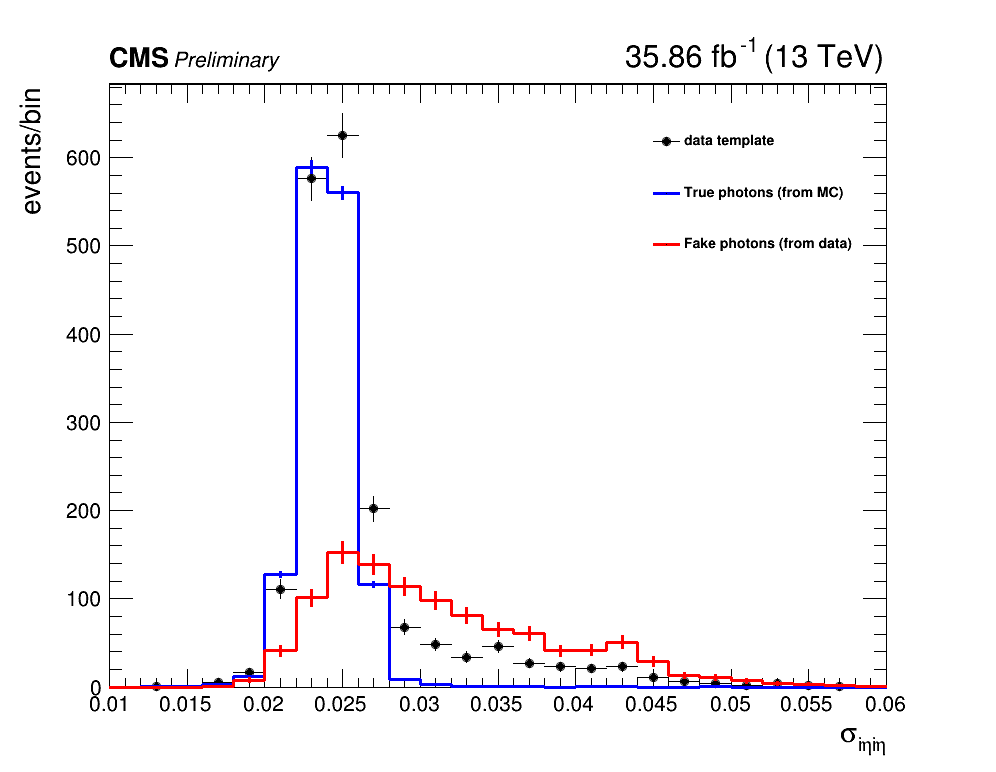

In [12]:
c1 = ROOT.TCanvas("","",1000,800)

xbins = hist_data.GetNbinsX()
print("bins :", xbins)

hist_data.SetStats(False)
c1.Draw()
hist_data.GetXaxis().SetTitle("#sigma_{i#etai#eta}")
hist_data.GetYaxis().SetTitle("events/bin")
hist_data.Draw("ep")

hist_mctruth.SetMarkerStyle(0)
hist_mctruth.SetLineColor(4)
hist_mctruth.SetLineWidth(3)
hist_mctruth.Draw("HiST SAME e")

hist_datafake.SetMarkerStyle(0)
hist_datafake.SetLineColor(2)
hist_datafake.SetLineWidth(3)
hist_datafake.Draw("HiST SAME e")



legend = ROOT.TLegend(0.65, 0.65, 0.80, 0.85)
legend.SetBorderSize(0)
legend.SetFillColor(0)
legend.SetTextSize(0.020)
legend.SetLineWidth(1)
legend.SetLineStyle(0)
legend.AddEntry(hist_data,'data template')
legend.AddEntry(hist_mctruth,'True photons (from MC)')
legend.AddEntry(hist_datafake,'Fake photons (from data)')
legend.Draw("SAME")

# ROOT.gPad.SetLogy()
# ROOT.gPad.SetGrid()
CMS_lumi(c1, 0, 0)

### Plot2 : After fit

bins region : 25 Endcap
35.86 fb^{-1} (13 TeV)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(fullpdf) directly selected PDF components: (ntrue)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(fullpdf) indirectly selected PDF components: (true_pdf)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(fullpdf) directly selected PDF components: (nfake)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(fullpdf) indirectly selected PDF components: (fake_pdf)


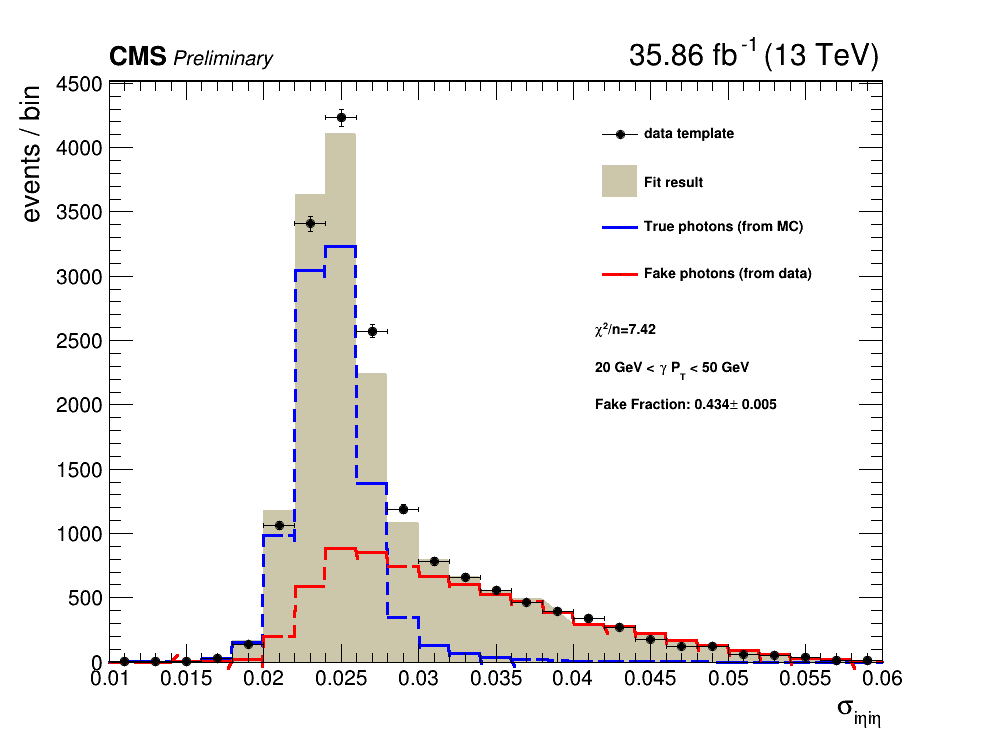

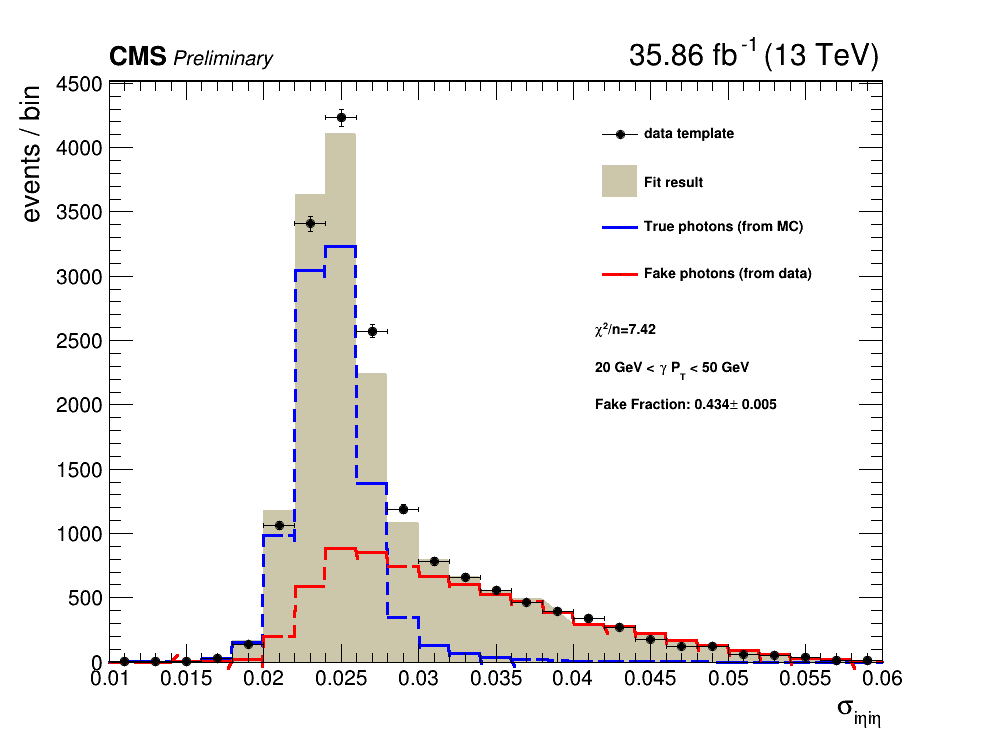

In [33]:
# Plot

if isbarrel == 1:
    region_mark = "Barrel"
else:
    region_mark = "Endcap"

xbins = hist_data.GetNbinsX()
print("bins region :", xbins,region_mark)

xframe = sieie.frame(ROOT.RooFit.Title(f"{region_mark} region, {ptrange[0]} GeV < photon PT < {ptrange[1]}"), ROOT.RooFit.Bins(xbins))
xframe.GetXaxis().SetTitle("#sigma_{i#etai#eta}")
xframe.GetYaxis().SetTitle("events / bin")
data_hist.plotOn(xframe)
fullpdf.plotOn(xframe, ROOT.RooFit.Name("sum"), ROOT.RooFit.FillStyle(4100), ROOT.RooFit.FillColor(20), ROOT.RooFit.DrawOption("F"))
fullpdf.plotOn(xframe, ROOT.RooFit.Components("ntrue"), ROOT.RooFit.Name("true"), ROOT.RooFit.LineColor(4), ROOT.RooFit.LineStyle(9))
fullpdf.plotOn(xframe, ROOT.RooFit.Components("nfake"), ROOT.RooFit.Name("fake"), ROOT.RooFit.LineColor(2), ROOT.RooFit.LineStyle(9))
data_hist.plotOn(xframe)



c1 = ROOT.TCanvas("","",1000,800)
c1.Draw()
xframe.Draw()

legend = ROOT.TLegend(0.60, 0.60, 0.80, 0.85)
legend.SetBorderSize(0)
legend.SetFillColor(0)
legend.SetTextSize(0.020)
legend.SetLineWidth(1)
legend.SetLineStyle(0)
legend.AddEntry(hist_data,'data template')
hist_fit_NaN = hist_data.Clone() # Just for plot
hist_fit_NaN.SetLineColor(20)
hist_fit_NaN.SetLineWidth(0)
hist_fit_NaN.SetFillColor(20)
hist_fit_NaN.SetMarkerStyle(0)
legend.AddEntry(hist_fit_NaN,'Fit result', "F")
legend.AddEntry(hist_mctruth,'True photons (from MC)')
legend.AddEntry(hist_datafake,'Fake photons (from data)')
legend.Draw("SAME")

textChi2 = ROOT.TLatex()
textChi2.SetNDC()
textChi2.SetTextSize(0.02)
textChi2.DrawLatex(0.6, 0.55, "#chi^{2}/n="+str("%.2f" % chi2ToNDF))
textChi2.DrawLatex(0.6, 0.50, str(ptrange[0])+" GeV < #gamma P_{T} < "+str(ptrange[1])+" GeV")
result_nfake = nfake.getVal()
result_nfake_err = nfake.getAsymErrorHi()
result_ntrue = ntrue.getVal()
result_ntrue_err = ntrue.getAsymErrorHi()
fake_fraction = result_nfake/(result_ntrue+result_nfake)
fake_fraction_err = numpy.sqrt(pow(result_nfake/pow(result_ntrue+result_nfake,2),2)*pow(result_ntrue_err,2) + pow(result_ntrue/pow(result_nfake+result_ntrue,2),2)*pow(result_nfake_err,2))
textChi2.DrawLatex(0.6, 0.45, "Fake Fraction: "+ str("%.3f" % fake_fraction) + "#pm " + str("%.3f" % fake_fraction_err)) 


CMS_lumi(c1, 0, 0)

# print (ntrue.getVal())
# print (ntrue.getAsymErrorHi())
# print (ntrue.getAsymErrorLo())

In [32]:
ntrue.getVal() +nfake.getVal()


599649.8050573984